# Test Your Software Installation

If this is your first time using a Jupyter notebook, please make sure to follow along with me in the class Video.  If you know what you are doing, just go ahead and run the cells and make sure everything works on your system.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt



###  No errors yet? Your software is installed!
If you don't have any errors from running the cell above, then you are set.

# Numpy

Numpy stands for numerical python.  It's giving us a LOT of very special things.
  * linear algebra
  * runs in C (so it's fast)
  * uses special libraries for your CPU to do the linear algebra routines FAST
  * gives us ndarrays -- n-dimensional arrays.
  
Numpy is the basis of machine learning in python.  Without it -- you have nothing. Literally nothing.  Every tool we use will use numpy, keras, tensorflow, pytorch, pymc3, pandas, scikit-learn, scikit-image, every single machine learning library you will ever find in python stands on top of numpy.

So let's see a tiny bit of what it can do

Examples taken from:
https://jakevdp.github.io/PythonDataScienceHandbook/

In [3]:
# Shape, Ndmin

np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

In [4]:
x1

array([5, 0, 3, 3, 7, 9])

In [5]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [6]:
x3

array([[[8, 1, 5, 9, 8],
        [9, 4, 3, 0, 3],
        [5, 0, 2, 3, 8],
        [1, 3, 3, 3, 7]],

       [[0, 1, 9, 9, 0],
        [4, 7, 3, 2, 7],
        [2, 0, 0, 4, 5],
        [5, 6, 8, 4, 1]],

       [[4, 9, 8, 1, 1],
        [7, 9, 9, 3, 6],
        [7, 2, 0, 3, 5],
        [9, 4, 4, 6, 4]]])

In [7]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60


In [8]:
print("dtype:", x3.dtype)


dtype: int64


In [9]:
a  = np.arange(1,10)
print(f"The shape is {a.shape}")
print(a)

The shape is (9,)
[1 2 3 4 5 6 7 8 9]


In [10]:
a.shape

(9,)

In [11]:
b = a.reshape(-1,1)

In [12]:
b.shape

(9, 1)

In [13]:
b

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [14]:
# Reshape
grid = np.arange(1, 10,.1).reshape((-1, 10))
print(grid)

[[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9]
 [2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9]
 [3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9]
 [4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]
 [5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9]
 [6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9]
 [7.  7.1 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9]
 [8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9]
 [9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]]


In [15]:
grid.shape

(9, 10)

# Numpy uses vectorization

Vectorization, uses Basic Linear Algebra Subroutines (BLAS), notably [strassens algorithm](https://youtu.be/ORrM-aSNZUs), and a bunch of other very cool things


In [19]:
def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output


values = np.random.randint(1, 10, size=5)
print(values)
print(compute_reciprocals(values))


[6 1 2 3 5]
[0.16666667 1.         0.5        0.33333333 0.2       ]


In [20]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

1.64 s ± 154 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
values

array([6, 1, 2, 3, 5])

In [22]:
values * 10

array([60, 10, 20, 30, 50])

In [23]:
print(compute_reciprocals(values))
print(1.0 / values)

[0.16666667 1.         0.5        0.33333333 0.2       ]
[0.16666667 1.         0.5        0.33333333 0.2       ]


In [24]:
%timeit (1.0 / big_array)

1.57 ms ± 57.4 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Broadcasting

In [25]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [26]:
a + 5


array([5, 6, 7])

In [27]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [28]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [29]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [30]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

# Let's plot a sine wave with numpy and matplotlib

You can adjust the range of the wave by playing around with the `np.arange()` parameters, the syntax is `(start, stop, step)` just like normal python slicing.  Except with step we can step by decimal amounts.

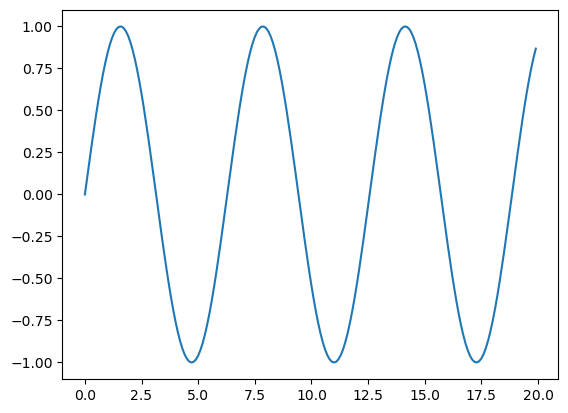

In [39]:
a = np.sin(np.arange(0,20,.1))
x = np.arange(0,20,.1)

# note in the video I may use plt.plot(x, a) -- this is will do the same as what I am using here, 
# BUT it is more confusing since it uses the stateful interface of matplotlib
# instead of the object-oriented interface - we would like to ALWAYS use the object-oriented interface
# for our mental sanity, it's the best way to use matplotlib.
# if this is confusing, don't worry much about it now, we will cover it in detail later on!

fig, ax = plt.subplots()
ax.plot(x, a); # we add the semi-colon ; in order to suppress an object output from jupyter -- go ahead and try removing it, you will see!


# We can dress up our plot a bit with extra attributes

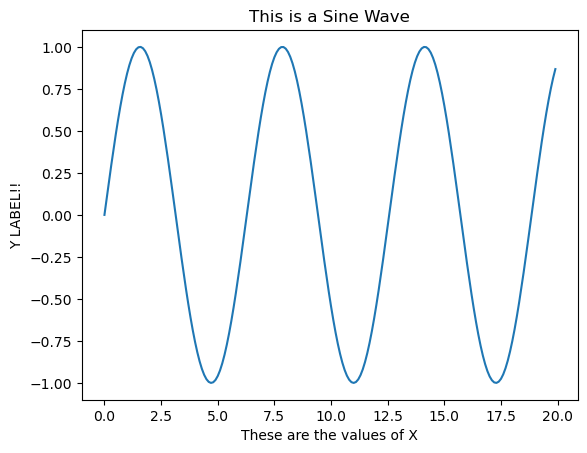

In [40]:
fig, ax = plt.subplots()
ax.plot(x, a)
ax.set_title("This is a Sine Wave")
ax.set_xlabel("These are the values of X")
ax.set_ylabel("Y LABEL!!");

If we want to control the size of the plot we have to do it _before_ we make the plot, at least that's one way.

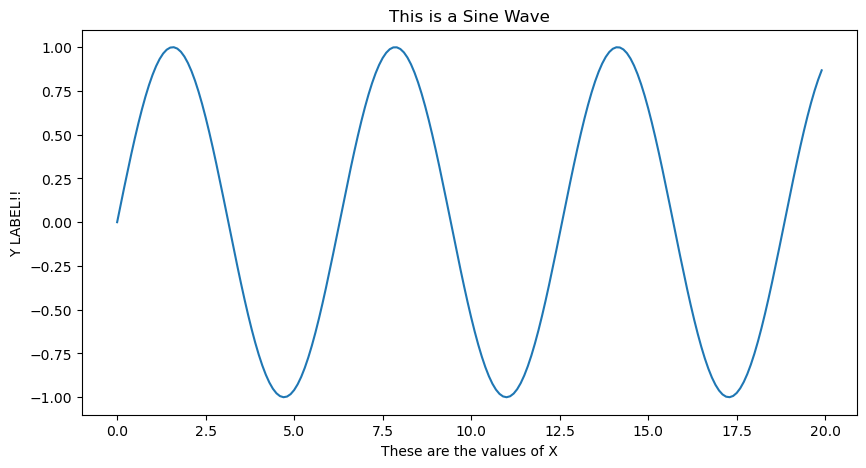

In [45]:
# figsize allows us to control the size of the plot, and we access it through the plots figure object

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, a)
ax.set_title("This is a Sine Wave")
ax.set_xlabel("These are the values of X")
ax.set_ylabel("Y LABEL!!");


## Finally let's plot a few other things on the same plot.


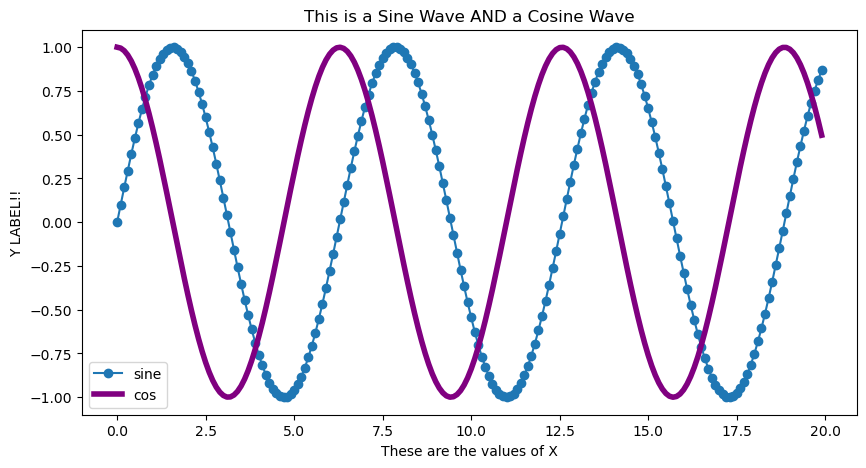

In [48]:
b = np.cos(np.arange(0,20,.1))
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, a, label = "sine", marker = 'o' ) # add a label so we can create a legend and mess with the marker
ax.plot(x, b, label = 'cos', linewidth = 4, color = 'purple') # add b by simply plotting it as well. , make it thicker and purple
ax.set_title("This is a Sine Wave AND a Cosine Wave")
ax.set_xlabel("These are the values of X")
ax.set_ylabel("Y LABEL!!")
ax.legend();

# Ok, let's load up some data with Scikit-Learn and Pandas
We will use some built-in datasets from Scikit-learn, later on we will learn to load our own data

**Note:** In the video, I use the Boston housing dataset, that dataset is no longer distrubuted with scikit-learn, so I switched to the California housing dataset. Overall the California housing dataset is better and more interesting, so it's a good change.

In [49]:
# here we are using a newer API than our video, we use as_frame=True, which 
# returns a DataFrame object as one of the attributes of the bunch object created.
california = datasets.fetch_california_housing(as_frame=True)

In [50]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

# Push our data into a pandas DataFrame for ease of use

In [51]:
# this is the older way of doing this, when we didn't have the as_frame=True argument
# so this is how I do it in the video
housing = pd.DataFrame(california.data, columns = california.feature_names)


## with as_frame=True you can just do
housing = california.frame

In [52]:
# look at the shape of your data, presents as (rows , columns)
housing.shape

(20640, 9)

In [53]:
# bottom 5 rows of the dataset
housing.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [54]:
# show the first 5 rows of data by default
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [55]:
housing['AveRooms'].mean()

np.float64(5.428999742190376)

In [56]:
housing.mean(axis = 0)

MedInc            3.870671
HouseAge         28.639486
AveRooms          5.429000
AveBedrms         1.096675
Population     1425.476744
AveOccup          3.070655
Latitude         35.631861
Longitude      -119.569704
MedHouseVal       2.068558
dtype: float64

In [57]:
housing.skew()

MedInc          1.646657
HouseAge        0.060331
AveRooms       20.697869
AveBedrms      31.316956
Population      4.935858
AveOccup       97.639561
Latitude        0.465953
Longitude      -0.297801
MedHouseVal     0.977763
dtype: float64

In [58]:
# some basic stats on our numerical data
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Some Indexing

Pandas has slicing built in, the same way python lists work (and numpy arrays).  This is done using the `[]` notation.  Additionally Pandas has some extra tricks with two main types of indexing `.iloc` which is primarily label based, and `.loc` which is primarily integer based.
You can read more [at the official docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)

In [59]:
housing[:3]  # gives first 3 rows of the dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [60]:
housing[3:11:2]  #rows 3 through 11, stepping by 2, note the start in inclusive and the end is excluded (like python)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


### `.iloc`
Ok, that works for rows, but as soon as we want columns in pandas we need to switch `.iloc`

In [61]:
housing.iloc[:3,:2] # the first 3 rows and 2 columns -- note the comma ',' which used to tell pandas that we are indexing both rows and columns

,MedInc,HouseAge
0,8.3252,41.0
1,8.3014,21.0
2,7.2574,52.0


In [62]:
# note we can do the same things we did before with `.iloc` as well
housing.iloc[:2]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


### `.loc`

Here we will use the based indexing.  We can use it to select columns by their string name.  
It's important to note that we will index with `.loc[:4, [strings]]` and that  4 is a label here, it's the index label, which happens to be an integer (it's an integer most of the time)


In [63]:
housing.loc[:4, ['MedInc', 'HouseAge']]

,MedInc,HouseAge
0,8.3252,41.0
1,8.3014,21.0
2,7.2574,52.0
3,5.6431,52.0
4,3.8462,52.0


### Boolean indexing

So a common thing we may want to do is look for certain rows (or columns) that hold a certain value.  This can be done with boolean indexing easily with pandas.
This is best thought of as a two step process
(1) create a boolean _mask_ 
(2) use your mask to _index_ your dataframe.

Let's answer the question "Show me the rows where the age of the home is greater than 30"

In [64]:
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [65]:
# step one, create the mask.
mask = housing['HouseAge']>30
mask

0         True
1        False
2         True
3         True
4         True
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: HouseAge, Length: 20640, dtype: bool

In [66]:
# Now I can use my boolean mask to index on the dataframe.  This is obviously a bit more complicated under the hood -- but it works fabulously.
housing[mask]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
...,...,...,...,...,...,...,...,...,...
20620,4.5625,40.0,4.125000,0.854167,151.0,3.145833,39.05,-121.48,1.000
20621,2.3661,37.0,7.923567,1.573248,484.0,3.082803,39.01,-121.47,0.775
20623,2.8235,32.0,5.101322,1.074890,598.0,2.634361,39.03,-121.37,0.655
20625,4.1250,37.0,7.285714,1.214286,29.0,2.071429,39.12,-121.52,0.720


In [67]:
# You will commonly see this pattern show up like this
housing[housing['HouseAge']>30]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
...,...,...,...,...,...,...,...,...,...
20620,4.5625,40.0,4.125000,0.854167,151.0,3.145833,39.05,-121.48,1.000
20621,2.3661,37.0,7.923567,1.573248,484.0,3.082803,39.01,-121.47,0.775
20623,2.8235,32.0,5.101322,1.074890,598.0,2.634361,39.03,-121.37,0.655
20625,4.1250,37.0,7.285714,1.214286,29.0,2.071429,39.12,-121.52,0.720


# A pandas Series is like a DataFrame, but for a single column

All the same rules apply, plus there are a few neat inbuilt functions that are available only on Series, but they are mostly the same

In [68]:
housing_targets = pd.Series(california.target)

In [69]:
housing_targets

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

# Finally, let's load at some data we can "look" at

In [70]:
digits = datasets.load_digits()

In [71]:
digits.data[0].shape  # shape tells us the dimension of our data, it's a 1D vector with 64 rows.

(64,)

In [72]:
digits.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

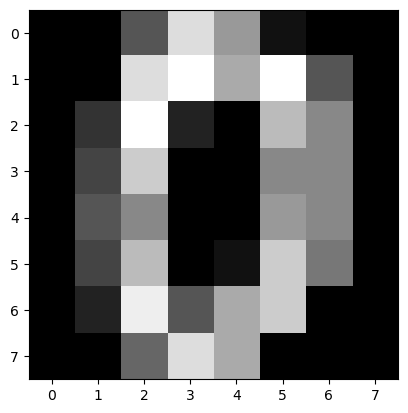

In [73]:
plt.imshow(digits.data[0].reshape(8,8), cmap='gray')  #we reshaped it into an 8,8 in order to plot it.

In [ ]:
digits.data.shape  #we have 1797 samples, each one is a vector of 64 rows.  In this case we have 1797 rows, each row is a row vector of length 64.

In [ ]:
fig, axes = plt.subplots(2, 10, figsize=(12, 2))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.data[i].reshape(8,8), cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])